In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [107]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

y_train = train_df['Transported']
test_passengerId = test_df["PassengerId"]

modes = train_df.mode().iloc[0] # Fill out the empty data

def proc_data(df):
    df.fillna(modes, inplace=True)

    
proc_data(train_df)
proc_data(test_df)

X_train = train_df
X_test = test_df

X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [100]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


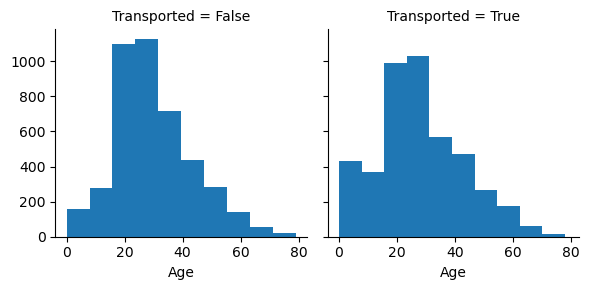

In [112]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=10)

In [101]:
train_df['CryoSleep'] = (train_df['CryoSleep']).astype(int)
test_df['CryoSleep'] = (test_df['CryoSleep']).astype(int)

train_df['HomePlanet'] = train_df['HomePlanet'].map( {'Europa': 0, 'Mars': 1, 'Earth': 2} ).astype(int)
test_df['HomePlanet'] = test_df['HomePlanet'].map( {'Europa': 0, 'Mars': 1, 'Earth': 2} ).astype(int)

train_df['Destination'] = train_df['Destination'].map( { '55 Cancri e': 0, 'PSO J318.5-22': 1, 'TRAPPIST-1e': 2 } ).astype(int)
test_df['Destination'] = test_df['Destination'].map( { '55 Cancri e': 0, 'PSO J318.5-22': 1, 'TRAPPIST-1e': 2 }).astype(int)



In [102]:

train_df.drop(columns=['Name', 'Transported', 'Cabin'], inplace=True)
test_df.drop(columns=['Name', 'Cabin'], inplace=True)

In [103]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28b359e80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28b357dc0>})

In [104]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 124}


In [105]:
y_pred = best_rf.predict(X_test)

In [106]:
output = pd.DataFrame({'PassengerId': test_passengerId, 'Transported': y_pred})
output_cut = output.iloc[:4277]
output_cut.to_csv('submission.csv', index=False)